# Data exploration

1. Exploration of Hornsea One bathymetric data.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [14]:
# load Hornsea One Bathymetrics.csv with space seperated values
df = pd.read_csv('data/Hornsea One Bathymetrics.csv', sep=' ')

# log dataframe headers
print(df.columns)

print(min(df['Lat']), max(df['Lat']))
print(min(df['Long']), max(df['Long']))

Index(['Lat', 'Long', 'Depth'], dtype='object')
53.7164048 53.9511514


KeyError: 'Lon'

In [ ]:
# plot Lat and Long and Depth, colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Lat'], df['Long'], df['Depth'], c=df['Depth'], cmap='viridis')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
ax.set_zlabel('Depth')
plt.show()


In [ ]:
# plot Lat and Long colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111)
map = ax.scatter(df['Lat'], df['Long'], c=df['Depth'], cmap='viridis')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')
plt.show()

Exploration of UK wind data.
(data/wind_test_data.nc)

In [4]:
from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap

In [10]:
file = 'data/wind_test_data.nc' # mention the path to the downloaded file
data = Dataset(file, mode='r') # read the data 
print(data)
print(type(data)) # print the type of the data 
print(data.variables.keys()) # print the variables in the data


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Composite Anomaly
    history: Created via daily composite webtool at NOAA/ESRL PSD
    description: Computed from the web page http://www.esrl.noaa.gov/psd/data/composites/day/ NOAA/ESRL PSD
    Conventions: COARDS
    dimensions(sizes): lon(144), lat(73), time(1)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 air(time, lat, lon)
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['lat', 'lon', 'time', 'air'])


In [11]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]-180.0
air = data.variables['air'][::]


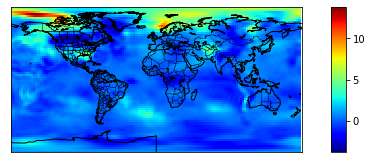

In [12]:
mp = Basemap()

longs, lats = np.meshgrid(lon,lat)  #this converts coordinates into 2D array

x,y = mp(longs,lats) #mapping them together 
plt.figure(figsize=(6,8)) #figure size 
c_scheme = mp.pcolor(longs, lats, np.squeeze(air[0,:,:]), cmap = 'jet') # [0,:,:] is for the first day of the year

# consider this as the outline for the map that is to be created 
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme,location='right',pad = '10%') # map information
plt.show()

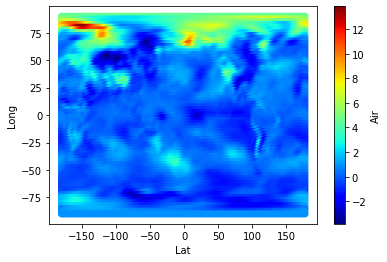

In [13]:
# plot Lat and Long colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111)
map = ax.scatter(longs, lats, c=np.squeeze(air[0,:,:]), cmap='jet')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Air')
plt.show()
